In [78]:
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import rasterio as rio
from rasterio.plot import show as rioshow
from rasterio.mask import mask

import geopandas as gpd

from pyproj import CRS
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt 
import os
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [79]:
#!pip install rasterio

In [85]:
dpt_shp = gpd.read_file( r'../../data/geopandas_data/LIMITE_DEPARTAMENTO/LIMITE_DEP.shp' )

with rio.open(r'../../data/geopandas_data/tavg.tif') as raster:
    epsg = raster.crs

In [86]:
raster.crs

CRS.from_epsg(4326)

In [87]:
# Leer el archivo raster y recortarlo con el shapefile
with rio.open(r'../../data/geopandas_data/tavg.tif') as raster:
    out_image, out_transform = mask(raster, dpt_shp.geometry, crop=True)


In [99]:
# mask los valores nodata
masked_image = out_image.astype(float)
masked_image[masked_image==raster.nodata] = float('nan')


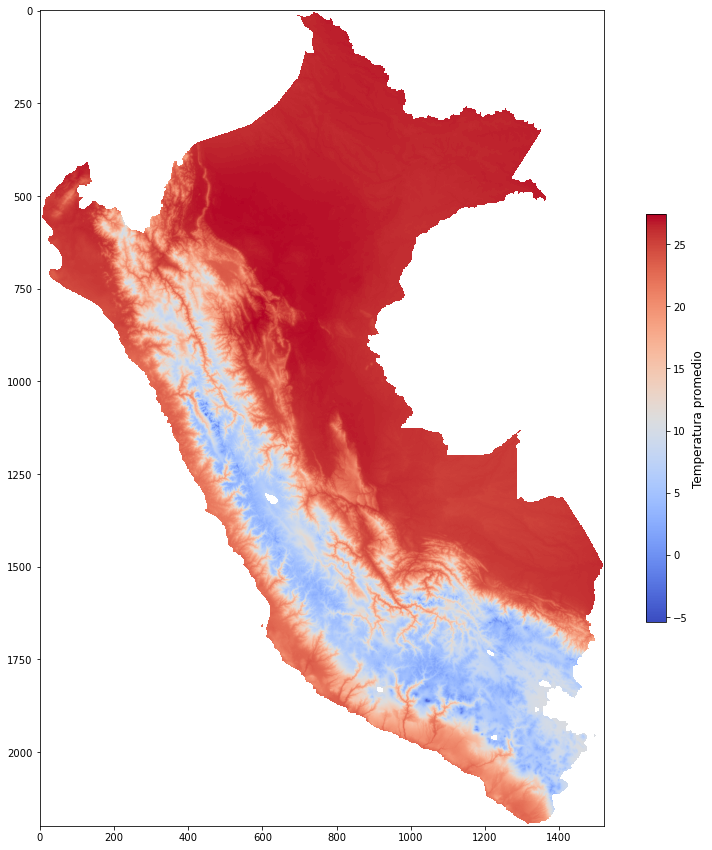

In [77]:
# Graficar la imagen enmascarada
fig, ax = plt.subplots( figsize=(15,15))

plt.imshow(masked_image[0], cmap='coolwarm')
#dpt_shp.plot( color = "none", edgecolor='black',  ax = ax)

plt.colorbar(shrink = 0.5).set_label('Temperatura promedio', size = 12)
plt.show()
